In [124]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Tabular Datasets

## Loading the data

In [125]:
artists = pd.read_csv(filepath_or_buffer='dataset/tabular/artists.csv', skipinitialspace=True)
tracks = pd.read_csv(filepath_or_buffer='dataset/tabular/tracks.csv', skipinitialspace=True)

In [126]:
artists['genres']

0        ['acid house', 'chicago house', 'chicago rap',...
1                       ['chicago house', 'classic house']
2         ['acid house', 'chicago house', 'classic house']
3                        ['chicago house', 'garage house']
4        ['chicago house', 'deep house', 'float house',...
                               ...                        
30136                                                   []
30137                          ['dutch edm', 'gaming edm']
30138                                         ['sky room']
30139                                       ['gaming edm']
30140                                                   []
Name: genres, Length: 30141, dtype: object

In [127]:
print(artists.shape[0], artists.shape[1])
print(tracks.shape[0], tracks.shape[1])
print(artists.columns)
print(tracks.columns)

30141 5
109547 34
Index(['id', 'name', 'popularity', 'followers', 'genres'], dtype='object')
Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')


In [128]:
tracks_cat = ['disc_number',
              'explicit',
              'album_type',
              'album_release_date_precision',
              'key',
              'mode', 
              'time_signature',
                ]

tracks_num = ['duration_ms',
              'popularity', 
              'track_number', 
              'album_total_tracks', 
              'danceability', 
              'energy', 
              'loudness', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'liveness', 
              'valence', 
              'tempo', 
              'features_duration_ms',
              'start_of_fade_out',
              'tempo_confidence',
              'time_signature_confidence',
              'key_confidence', 
              'mode_confidence',
              'n_beats',
              'n_bars',
             ]

artists_cat = []
artists_num = ['popularity', 'followers']

## Data Distribution

## Tracks

#### Bar charts

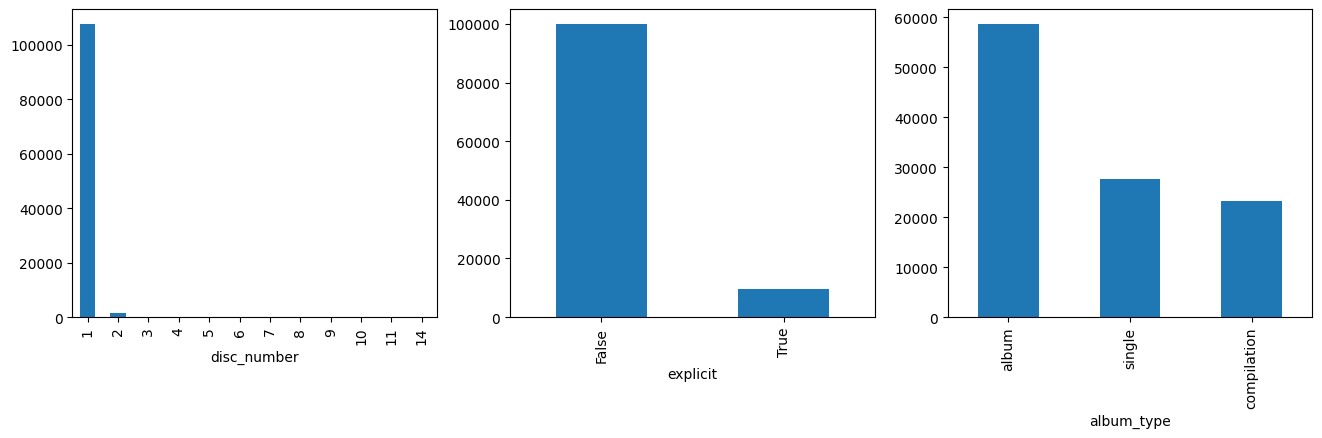

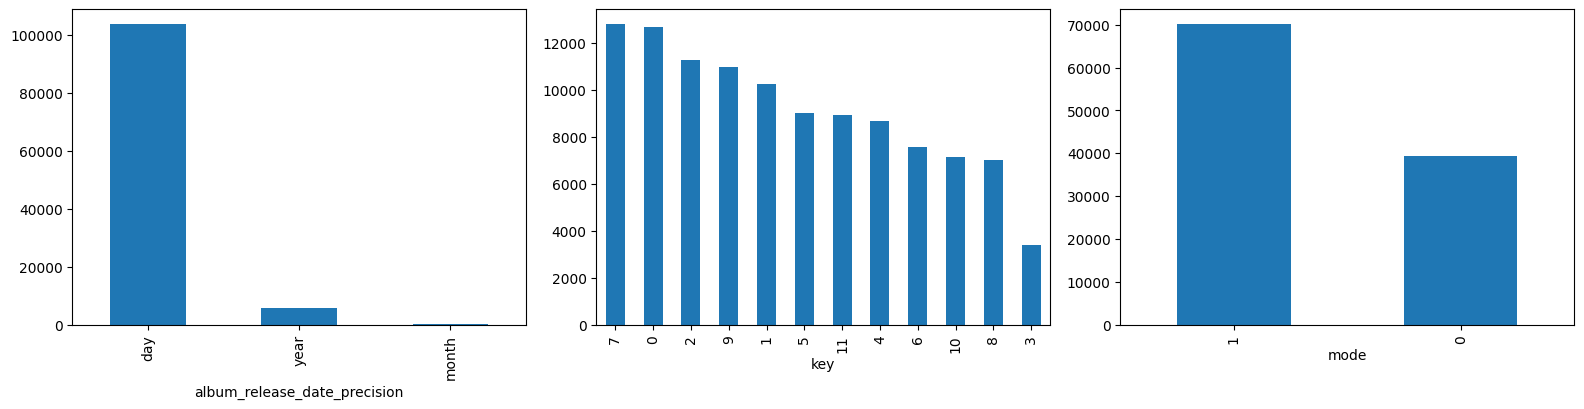

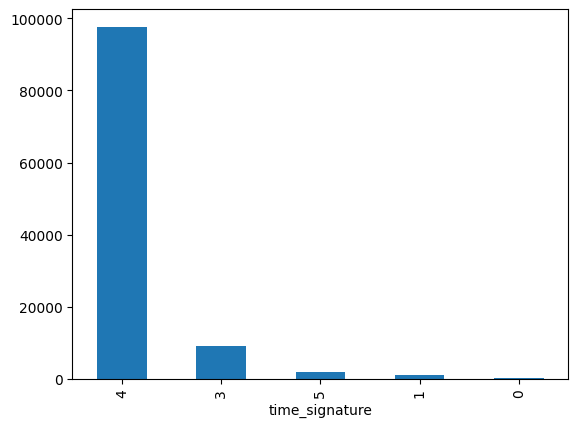

In [100]:
# Bar charts
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
#fig.tight_layout(pad=2)
tracks['disc_number'].value_counts().plot(kind='bar', ax=axs[0])
tracks['explicit'].value_counts().plot(kind='bar', ax=axs[1])
tracks['album_type'].value_counts().plot(kind='bar',  ax=axs[2])
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.tight_layout(pad=2)
tracks['album_release_date_precision'].value_counts().plot(kind='bar', ax=axs[0])
tracks['key'].value_counts().plot(kind='bar', ax=axs[1])
tracks['mode'].value_counts().plot(kind='bar', ax=axs[2])
plt.show()

tracks['time_signature'].value_counts().plot(kind='bar')
plt.show()


#### Histograms

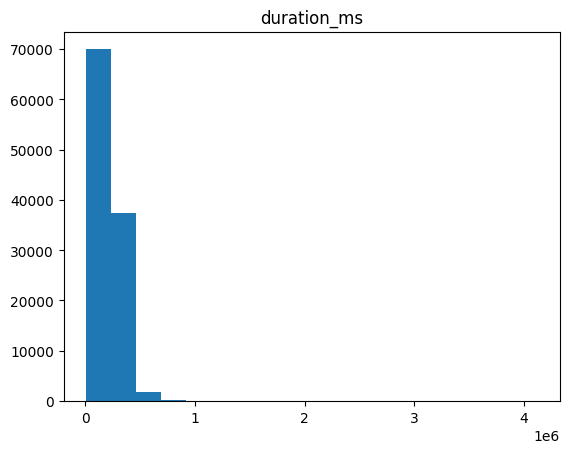

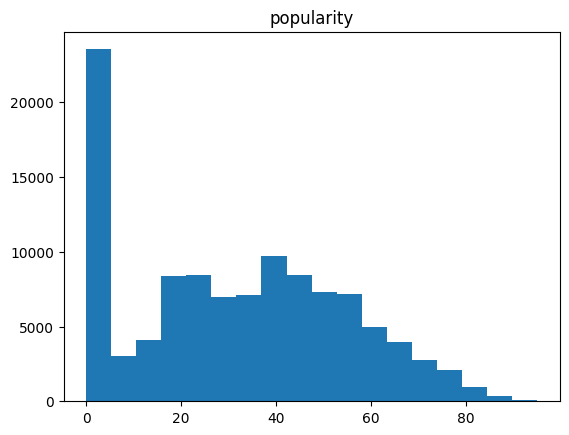

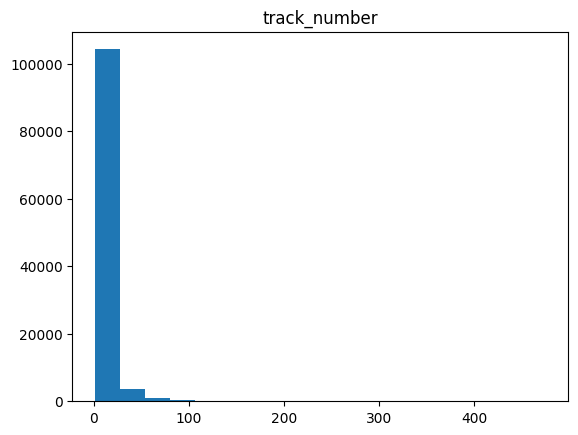

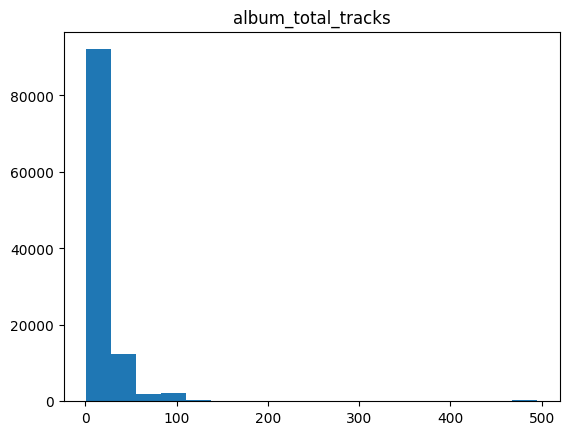

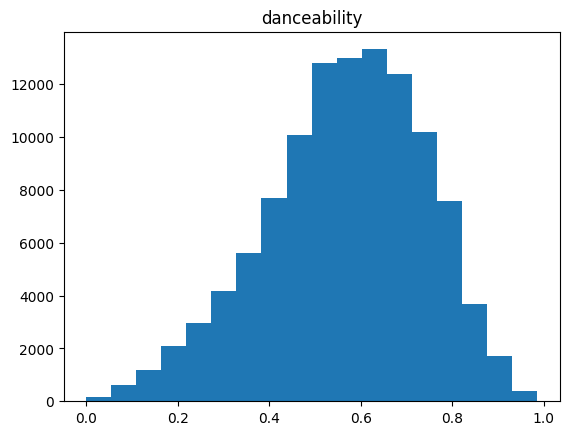

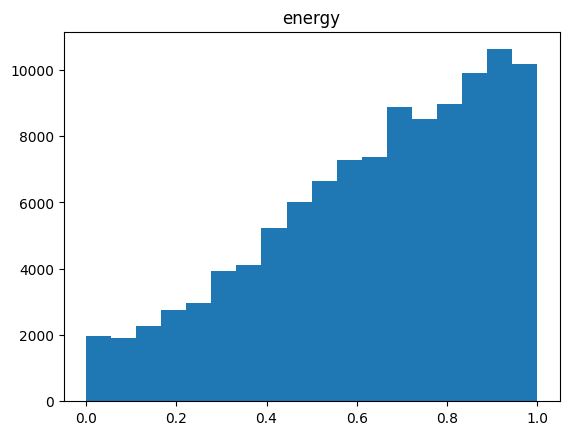

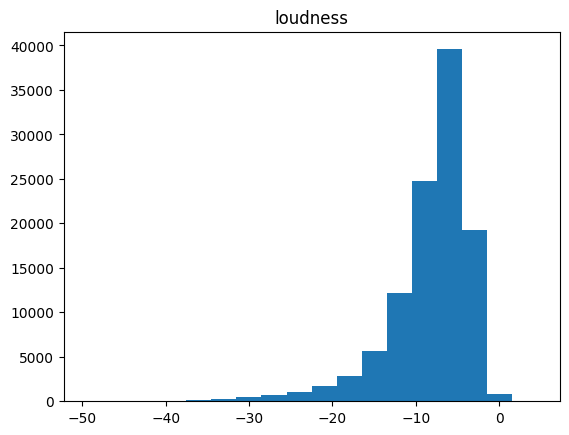

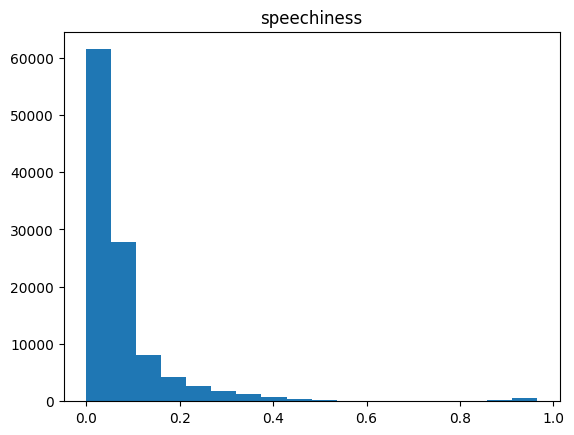

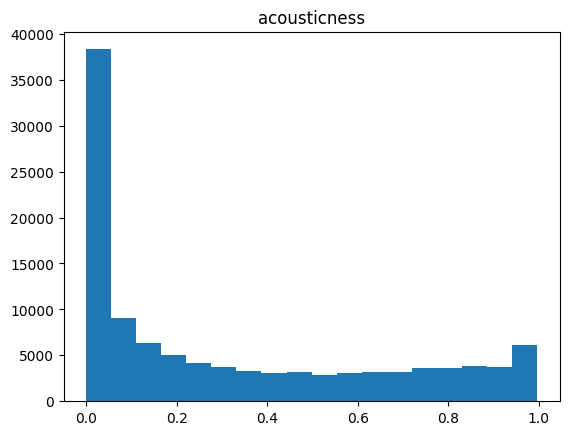

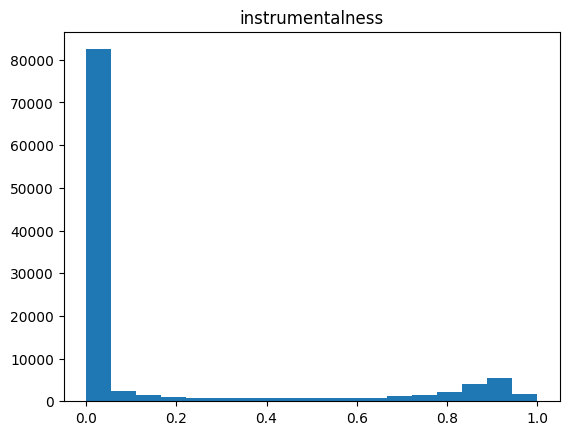

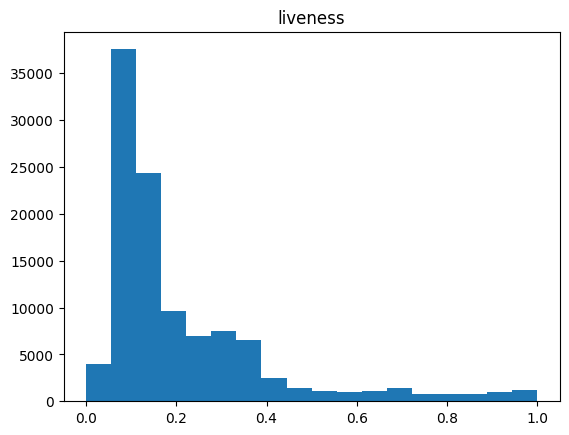

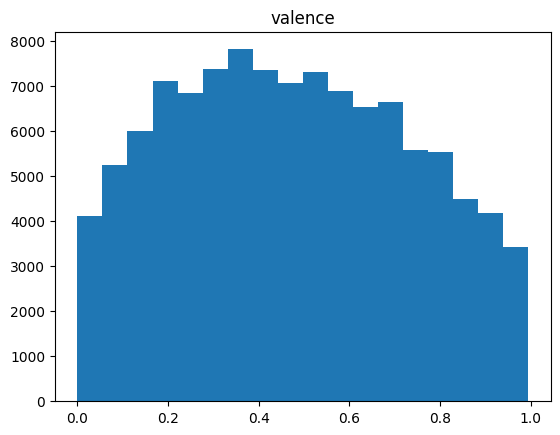

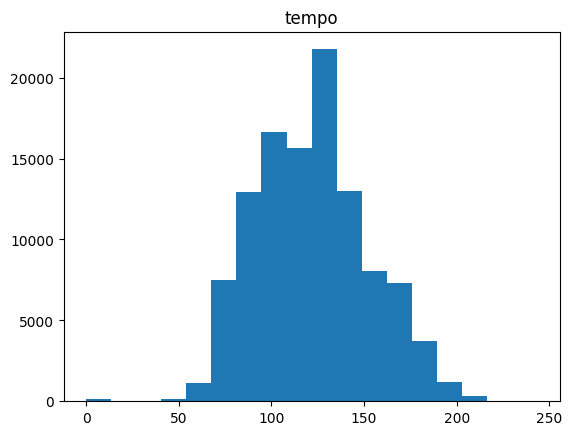

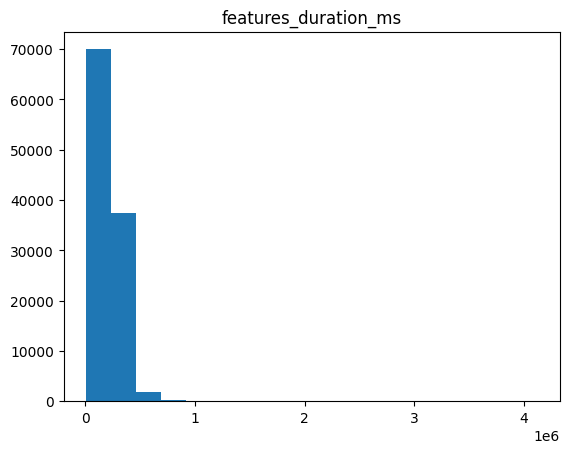

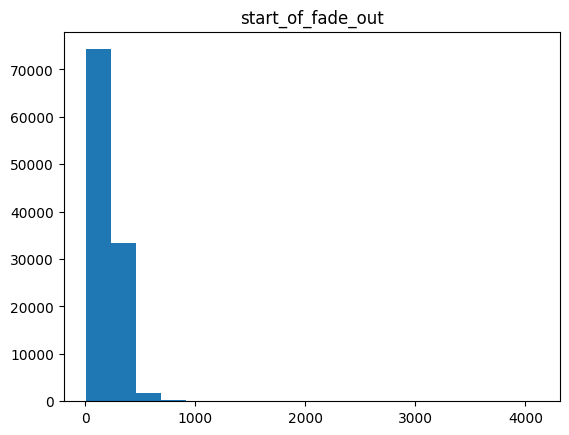

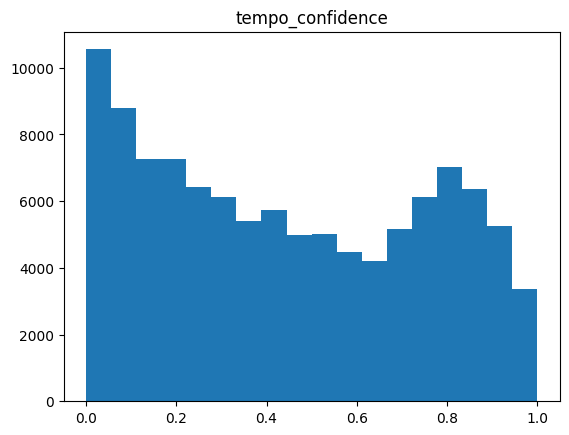

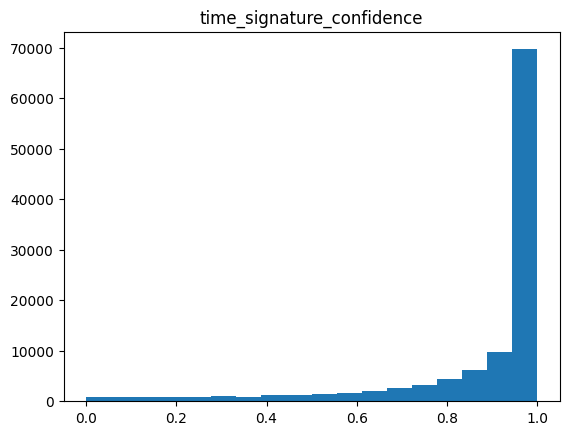

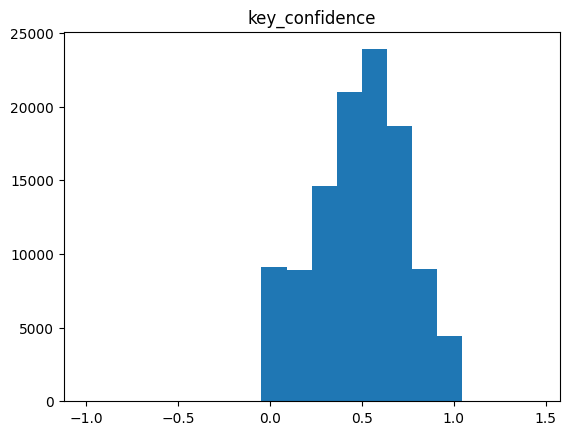

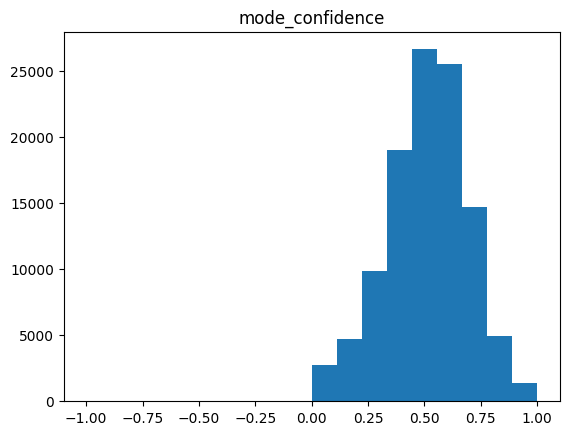

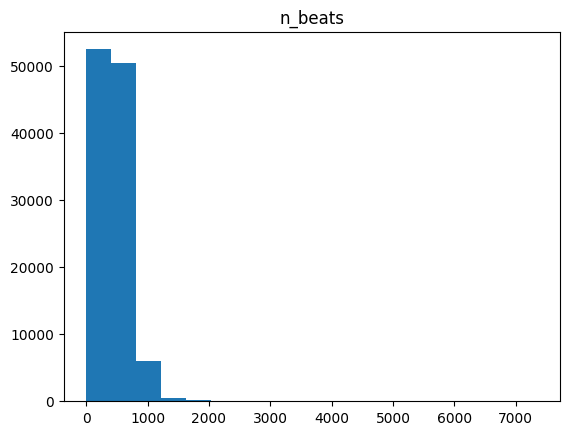

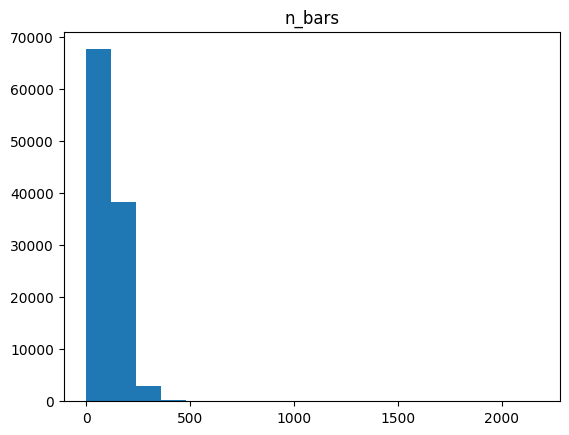

In [75]:
# Histograms
log = math.log(tracks.shape[0], 2)
k = math.ceil(log) + 1

for col in tracks_num:
    tracks.hist(bins=k, column=col, grid=False)    
    plt.show()   

## Artists

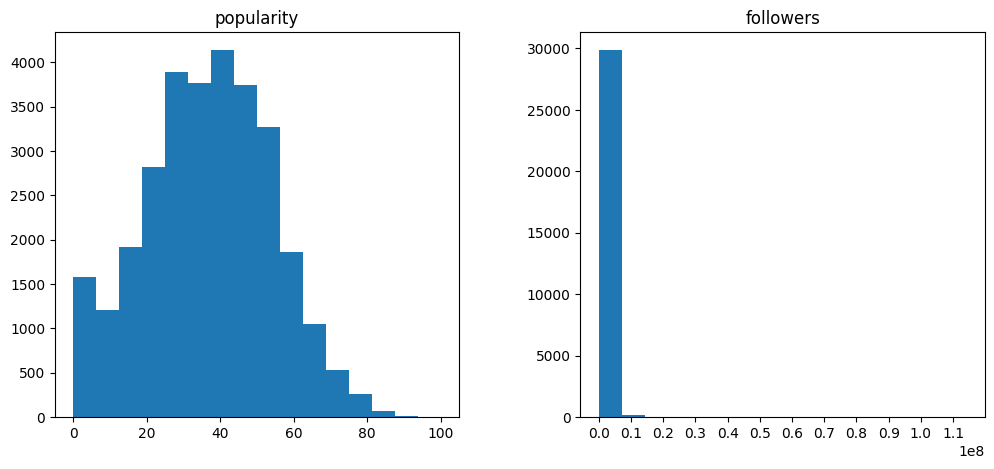

In [11]:
log = math.log(artists.shape[0], 2)
k = math.ceil(log) + 1

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

artists.hist(bins=k, column='popularity', grid=False, ax=axs[0])

artists.hist(bins=k, column='followers', grid=False, ax=axs[1])
plt.xticks(np.arange(0, 1.2e8, 1e7))
plt.savefig('./img/Data Understanding/artists_hist.png', dpi=300, bbox_inches='tight')
plt.show()

## Missing Values

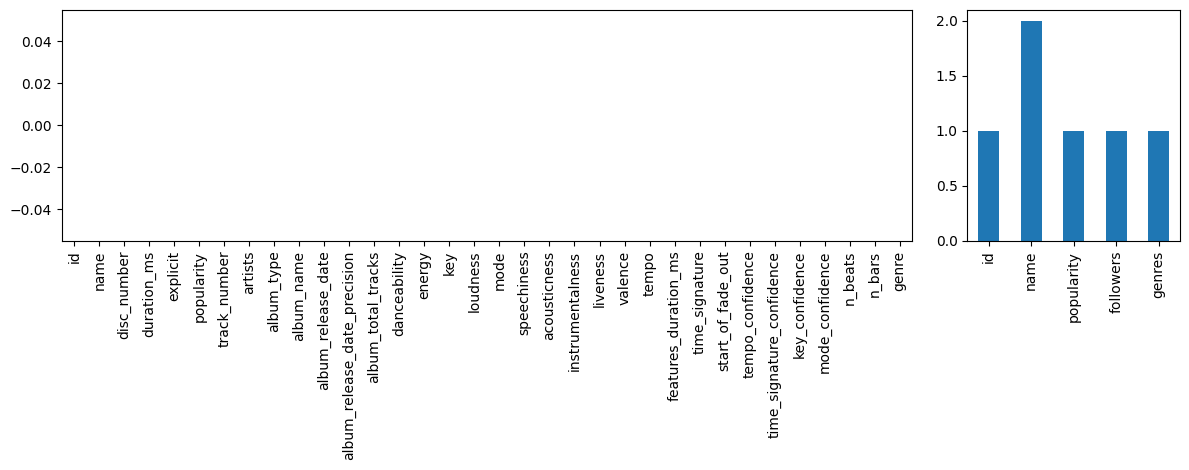

In [48]:
fig, axs = plt.subplots(1,2,width_ratios=[4,1])
fig.set_figwidth(12)
tracks.isna().sum().plot(kind='bar', ax=axs[0])
artists.isna().sum().plot(kind='bar', ax=axs[1])
plt.tight_layout()
plt.show()

In [49]:
artists.drop(index=artists.index[artists['name'].isna()].tolist(), inplace=True)

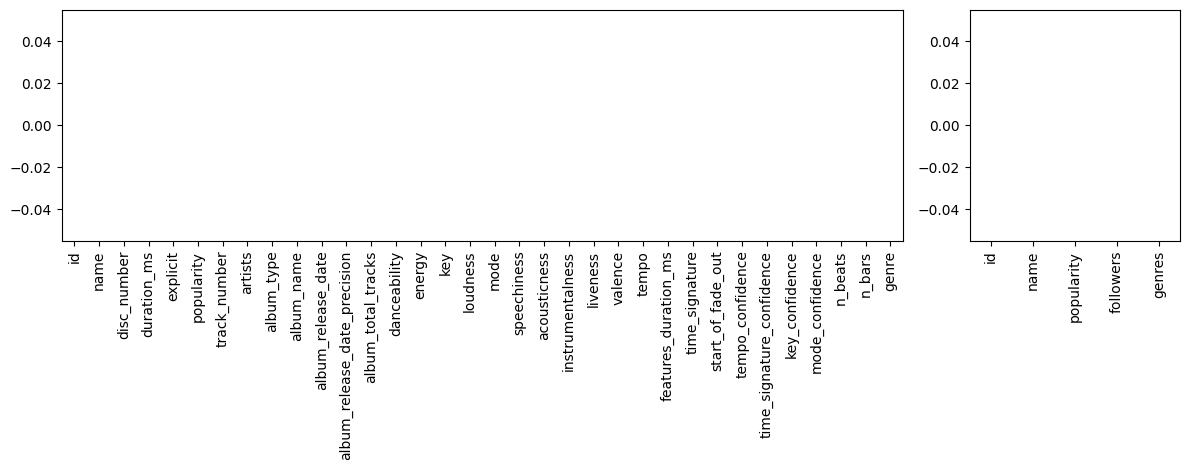

In [50]:
fig, axs = plt.subplots(1,2,width_ratios=[4,1])
fig.set_figwidth(12)
tracks.isna().sum().plot(kind='bar', ax=axs[0])
artists.isna().sum().plot(kind='bar', ax=axs[1])
plt.tight_layout()
plt.show()

## Inconsistencies

In [12]:
for col in artists.select_dtypes(include=np.number).columns:
    print('-', col, ':', artists[col].min(), artists[col].max())

- popularity : 0.0 100.0
- followers : 0.0 114163489.0


In [66]:
for col in tracks.select_dtypes(include=np.number).columns:
    print('-', col, ':', tracks[col].min(), tracks[col].max())

- disc_number : 1 14
- duration_ms : 8586 4120258
- popularity : 0 95
- album_total_tracks : 1 495
- danceability : 0.0 0.985
- energy : 0.0 1.0
- key : 0 11
- loudness : -49.531 4.532
- mode : 0 1
- speechiness : 0.0 0.965
- acousticness : 0.0 0.996
- instrumentalness : 0.0 1.0
- liveness : 0.0 1.0
- valence : 0.0 0.995
- tempo : 0.0 243.372
- time_signature : 0 5
- tempo_confidence : 0.0 1.0
- time_signature_confidence : 0.0 1.0
- key_confidence : -1.0 1.454


Only three records with inconsistent values

In [68]:
tracks.loc[tracks['key_confidence'] > 1.0, 'key_confidence'] = 1.0
tracks.loc[tracks['key_confidence'] < 0.0, 'key_confidence'] = 0.0

## Correlation

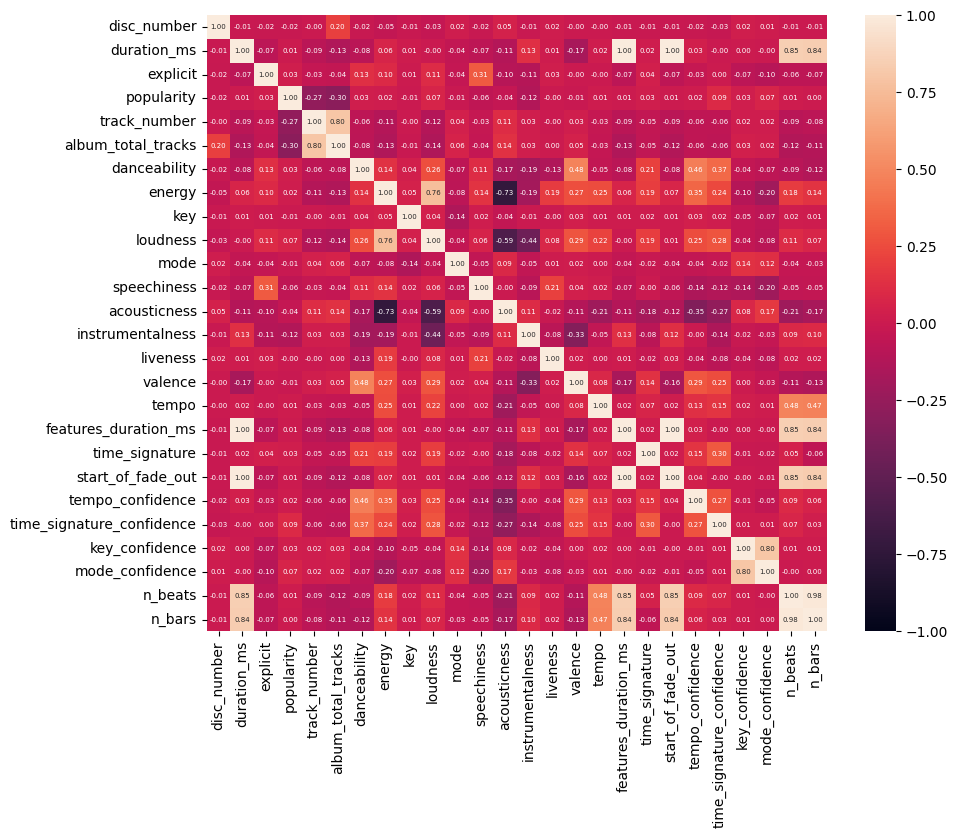

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=tracks.corr(numeric_only=True), annot=True, vmin=-1.0, vmax=1.0, annot_kws={"fontsize":5}, fmt='.2f')

plt.savefig('./img/Data Understanding/correlation_matrix_before.png', dpi=300, bbox_inches='tight')

plt.show()

In [65]:
tracks.drop(columns=['features_duration_ms', 'start_of_fade_out', 'track_number', 'mode_confidence', 'n_beats', 'n_bars'], inplace=True)

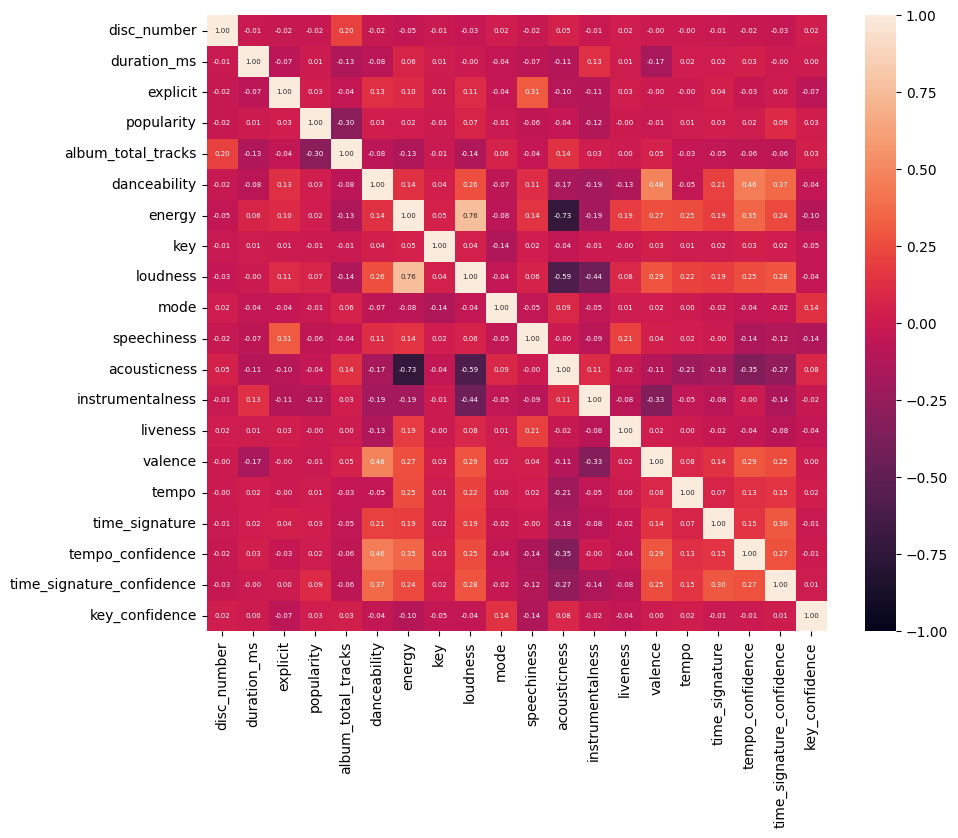

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=tracks.corr(numeric_only=True), annot=True, vmin=-1.0, vmax=1.0, annot_kws={"fontsize":5}, fmt='.2f')

plt.savefig('./img/Data Understanding/correlation_matrix_after.png', dpi=300, bbox_inches='tight')

plt.show()

## Duplicates

In [129]:
print(artists.duplicated().sum())
print(tracks.duplicated().sum())

2
398


In [130]:
artists.drop_duplicates(inplace=True)
tracks.drop_duplicates(inplace=True)
tracks.reset_index(inplace=True, drop=True)
artists.reset_index(inplace=True, drop=True)

In [131]:
print(artists['id'].duplicated().sum())
print(artists['name'].duplicated().sum())

0
221


Different artists with the same name.

In [132]:
tracks['id'].duplicated().sum()

19587

Nearly identical records. Most rows are equal except for the very last column=genre, their genre is similar.
There is a couple of records where only one of them has explicit=True, some that differ for popularity, some for the artists.

#### Replacing different explicit values

The value of both records is set to True.

In [133]:
groupby_explicit = pd.DataFrame(tracks[tracks['id'].duplicated(keep=False)].groupby(by=['id']).agg(list)['explicit'])

In [134]:
for i in range(groupby_explicit.shape[0]):
    # Duplicate removal
    groupby_explicit.iloc[i]['explicit'] = list(set(groupby_explicit.iloc[i]['explicit']))
for i in range(groupby_explicit.shape[0]):
    # Lists that have more than one element
    if len(groupby_explicit.iloc[i]['explicit']) > 1:
        print(groupby_explicit.iloc[i])

explicit    [False, True]
Name: 769Fq73HiVK9qfOQKKvpLB, dtype: object


In [135]:
tracks[tracks['id'] == '769Fq73HiVK9qfOQKKvpLB']['explicit'].replace(False, True)

51468    True
68793    True
Name: explicit, dtype: bool

#### Replacing artist names

Differences are caused by inconsistencies. The names of artists are replaced with the "correct" spelling found in the artists dataset.

In [136]:
groupby_artists = pd.DataFrame(tracks[tracks['id'].duplicated(keep=False)].groupby(by=['id']).agg(list)['artists'])

In [137]:
for i in range(groupby_artists.shape[0]):
    # Duplicate removal
    groupby_artists.iloc[i]['artists'] = list(set(groupby_artists.iloc[i]['artists']))
for i in range(groupby_artists.shape[0]):
    # Lists that have more than one element
    if len(groupby_artists.iloc[i]['artists']) > 1:
        print(groupby_artists.iloc[i]['artists'])

['Vickeblanka', 'Vicke Blanka']
['Vickeblanka', 'Vicke Blanka']
['Vickeblanka', 'Vicke Blanka']
['Yuvan Shankar Raja;KK', 'Yuvan Shankar Raja;Kay Kay']
['Vickeblanka', 'Vicke Blanka']


In [138]:
# Which is correct?
print(artists[artists['name'] == 'Vicke Blanka'].empty)
print(artists[artists['name'] == 'Vickeblanka'].empty)

print(artists[artists['name'] == 'KK'].empty)
print(artists[artists['name'] == 'Kay Kay'].empty)

False
True
False
True


In [139]:
# Replace all tracks with those artists with the name used in the artists dataset
tracks['artists'].replace('Vickeblanka', 'Vicke Blanka', inplace=True)
tracks['artists'].replace('Yuvan Shankar Raja;Kay Kay', 'Yuvan Shankar Raja;KK', inplace=True)

#### Calculating mean popularity 

In [140]:
groupby_popularity = pd.DataFrame(tracks[tracks['id'].duplicated(keep=False)].groupby(by=['id']).agg(list)['popularity'])

In [141]:
for i in range(groupby_popularity.shape[0]):
    # Duplicate removal
    groupby_popularity.iloc[i]['popularity'] = list(set(groupby_popularity.iloc[i]['popularity']))

id_list = []

for i in range(groupby_popularity.shape[0]):
    # Lists that have more than one element
    if len(groupby_popularity.iloc[i]['popularity']) > 1:
        id_list.append(groupby_popularity.iloc[i].name)

In [142]:
for id in id_list:
    mean_pop = math.ceil(tracks[tracks['id'] == id]['popularity'].mean())
    tracks.loc[tracks['id'] == id, 'popularity'] = mean_pop

#### Choosing a genre

In [143]:
groupby_genre = pd.DataFrame(tracks[tracks['id'].duplicated(keep=False)].groupby(by=['id']).agg(list)['genre'])

In [144]:
np.random.seed(42)
for i in range(groupby_popularity.shape[0]):
    tracks.loc[tracks['id'] == groupby_genre.iloc[i].name, 'genre'] = np.random.choice(groupby_genre.iloc[i]['genre'])

In [145]:
tracks.drop_duplicates(inplace=True)
tracks.reset_index(inplace=True, drop=True)

In [147]:
tracks.shape[0]

89563

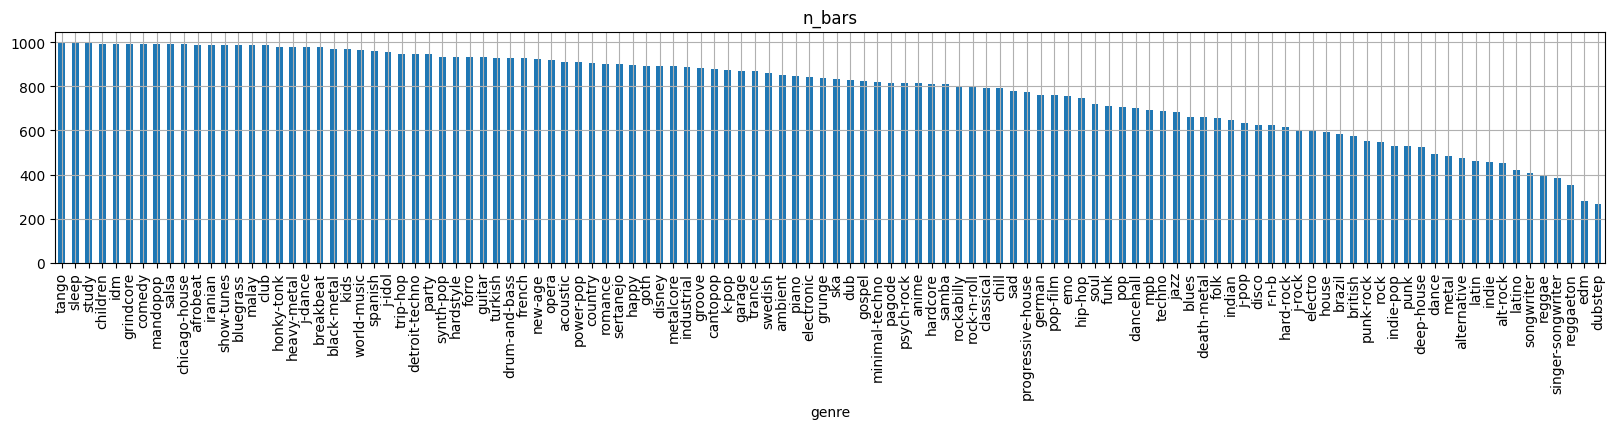

In [35]:
plt.figure(figsize=(20, 3))
tracks['genre'].value_counts().plot(kind='bar', title=col, grid=True)
plt.show()

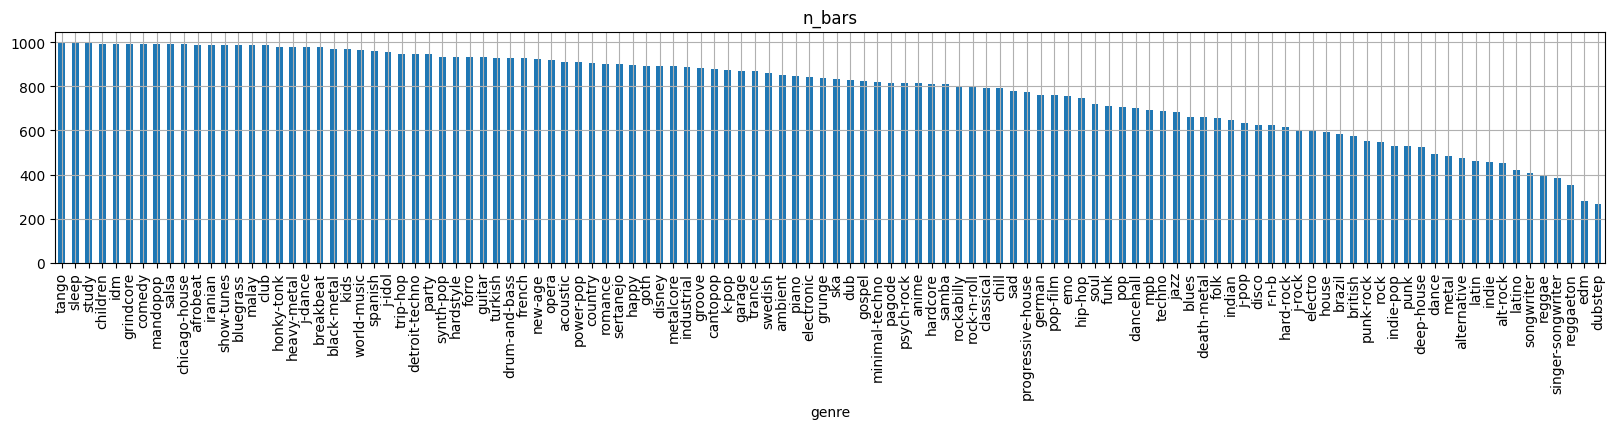

In [36]:
plt.figure(figsize=(20, 3))
tracks['genre'].value_counts().plot(kind='bar', title=col, grid=True)
plt.show()

Merged by choosing only one genre (see if distribution changes drastically)

## Variable Transformations

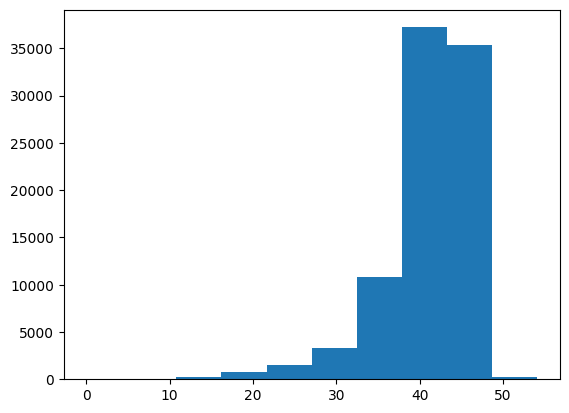

In [37]:
def add_min_loudness(x):
    return x + abs(tracks['loudness'].min())

tracks['loudness'] = tracks['loudness'].apply(add_min_loudness)
tracks['loudness'].hist(grid=False)
plt.show()

In [38]:
# Saving the datasets
artists.to_csv("dataset_preprocessed/tabular/artists.csv", index=False)
tracks.to_csv("dataset_preprocessed/tabular/tracks.csv", index=False)

# Time Series

## Loading Time Series

In [20]:
def load_npy(filename):
    return np.load(filename)

In [21]:
dir_path = './dataset/time_series/'
len_threshold = 1280

In [22]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [23]:
X.shape, y.shape

((10000, 1, 1280), (10000,))

In [24]:
tsdf = pd.DataFrame(np.squeeze(X))
tsdf["genre"] = y
tsdf

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,768.953928,828.022584,941.386304,945.749554,1159.725465,1240.333451,1423.674344,1634.191655,1828.503961,1847.519588,...,1340.313921,1279.665800,1360.056734,1444.307480,1517.640273,1458.297057,1442.914786,1391.236018,1321.283908,opera
1,3230.211119,3344.520081,3136.686050,2845.915331,2808.156723,2651.146880,2495.342218,2549.019959,2661.295847,2727.635261,...,2694.619211,3191.035809,2830.924961,2308.329541,1724.827512,1325.563666,1130.380398,978.286919,899.698980,minimal-techno
2,2192.694219,1986.904857,2082.598864,2254.738538,2401.683572,2407.616566,2217.455236,2091.153692,1957.757435,1862.646861,...,3025.026862,3222.103029,3303.188014,3347.910378,3343.393614,3378.469131,3533.683709,3432.652557,3476.442086,goth
3,1050.270174,1122.238261,1176.087855,1132.076020,1099.776970,1044.397110,1017.142440,1071.410733,1101.055515,1114.730346,...,877.321930,859.559805,802.391176,798.260556,753.313485,770.064609,804.954898,839.047077,851.398559,opera
4,2467.430056,2222.344861,2053.680022,1733.958104,1115.226422,821.548505,964.249252,1550.314474,2235.348186,2176.156140,...,763.993678,1417.110211,1939.536578,1798.345901,1245.512644,1079.249670,1005.486618,926.054992,964.566937,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2548.124862,2546.788233,2649.905705,2659.042892,2739.511966,2733.944363,2880.998890,2981.835024,3166.374133,3280.319527,...,3029.181437,2885.266212,2740.819521,2545.461249,2638.891888,2936.289554,2917.328360,2730.350407,2609.564983,sleep
9996,2228.440176,2254.232821,2708.213067,2628.270963,2435.534537,2608.498513,2880.992403,3051.814048,2945.827688,2689.657712,...,2323.393471,2266.863656,2222.550753,2289.493743,2308.147315,2370.018721,2399.885699,2172.397959,2040.035946,songwriter
9997,2744.444167,2714.723088,2696.453246,2946.824085,3290.350700,3590.748661,3391.136867,2875.449961,3000.725993,3341.052924,...,6206.808889,5680.641287,3864.233246,3679.890839,3784.591377,3828.972870,3747.162877,3684.384552,3837.186219,kids
9998,1679.191508,1371.382114,1276.830645,1667.736417,1932.889145,1889.347707,1701.279505,1684.952873,1677.765190,1429.459174,...,2954.189607,2065.144493,2008.085378,1958.001344,1771.220881,1758.607273,1590.939027,1215.853836,1044.419647,kids


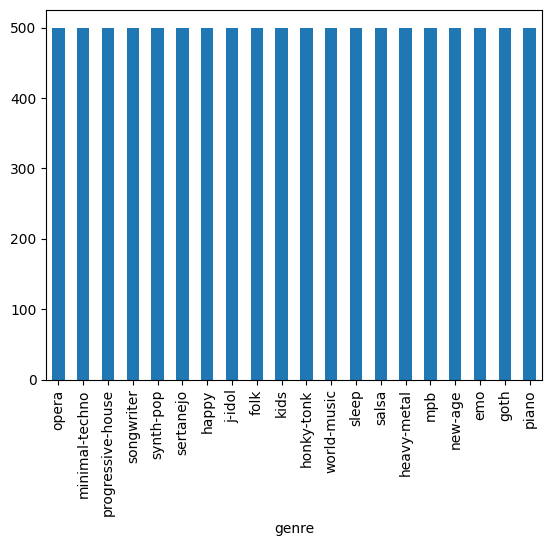

In [25]:
tsdf['genre'].value_counts().plot(kind='bar')
plt.show()

## Transformations

First, a random sample is visualized

In [26]:
sample = tsdf.groupby(['genre']).apply(lambda f: f.sample(n=1, random_state=42))

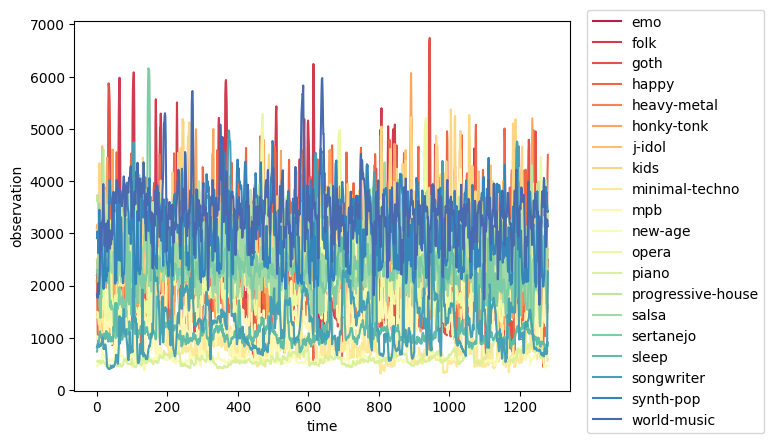

CPU times: user 2.68 s, sys: 275 ms, total: 2.95 s
Wall time: 2.83 s


In [31]:
%%time

df_melt = sample.melt(value_name="observation", var_name="time", id_vars="genre")
sns.lineplot(df_melt, x='time', y='observation', estimator=None, hue='genre', palette='Spectral')
plt.legend(bbox_to_anchor=(1.02, 1.05))


plt.show()

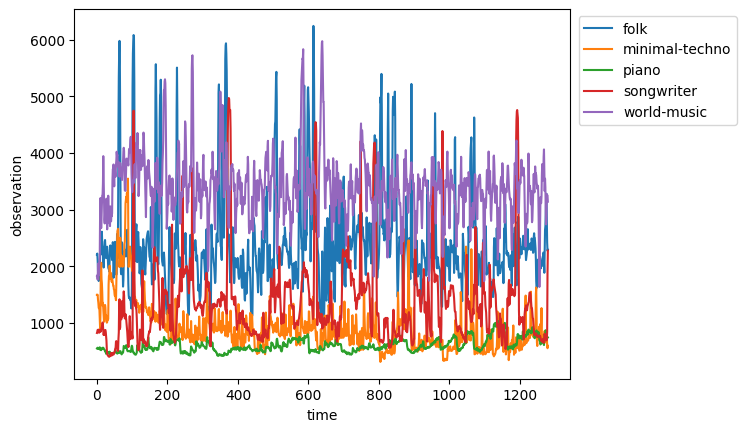

In [36]:
sample_filtered = sample[sample['genre'].isin(['minimal-techno',
                                              'folk',
                                              'world-music',
                                              'piano',
                                              'songwriter'])]
df_melt = sample_filtered.melt(value_name="observation", var_name="time", id_vars="genre")
sns.lineplot(df_melt, x='time', y='observation', estimator=None, hue='genre', palette='tab10')
plt.legend(bbox_to_anchor=(1.35, 1.00))

plt.savefig('./img/Data Understanding/time_series_sample_before.png', dpi=300, bbox_inches='tight')

plt.show()

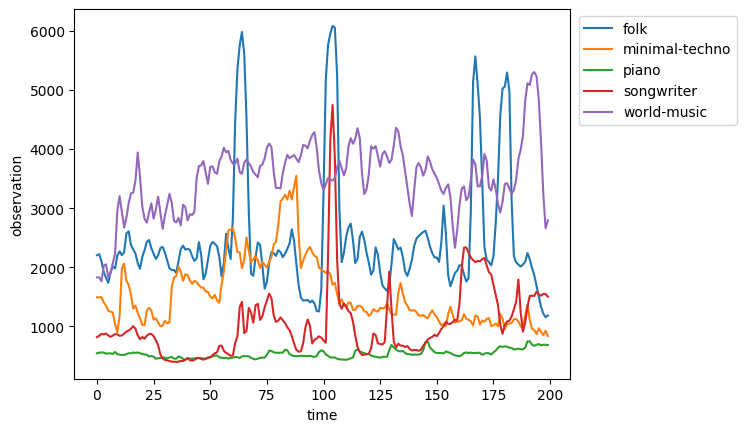

In [37]:
sns.lineplot(df_melt[:5*200], x='time', y='observation', estimator=None, hue='genre')
plt.legend(bbox_to_anchor=(1.35, 1.00))
plt.show()

From the sample we can see that the time series are unaligned on the y axis and have different amplitudes. They should also be denoised.

In [38]:
# Temporarily removing the labels:
labels = tsdf.iloc[:,-1]
tsdf = tsdf.iloc[:,:-1]

#### Amplitude Scaling

In [39]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

In [40]:
transpose = tsdf.values.T

In [41]:
scaler = TabularToSeriesAdaptor(StandardScaler(with_std=True))
transpose = scaler.fit_transform(transpose)

In [42]:
tsdf = pd.DataFrame(transpose.T)

Creating two approximated datasets: one for clustering/classification, one for sequential pattern mining

#### PAA 

In [43]:
from sktime.transformations.panel.dictionary_based import PAAlegacy

In [44]:
X = tsdf.values
X = np.reshape(X, (10000, 1, 1280))

In [45]:
paa = PAAlegacy(num_intervals=100)
X = paa.fit_transform(X)
X = np.reshape(X, (10000, 100))

In [46]:
tsdf_PAA = pd.DataFrame(X)

#### SAX (for SPM)

In [47]:
from sktime.transformations.series.sax import SAX

In [48]:
X = tsdf.values
X = np.reshape(X, (10000, 1, 1280))

In [49]:
sax = SAX(word_size=64, alphabet_size=4)
X = sax.fit_transform(X)
X = np.reshape(X, (10000, 64))

In [50]:
tsdf_SAX = pd.DataFrame(X)

Visualizing the sample, now transformed

In [51]:
# Reading the labels
tsdf_PAA['genre'] = labels

In [52]:
sample = tsdf_PAA.groupby(['genre']).apply(lambda f: f.sample(n=1, random_state=42))

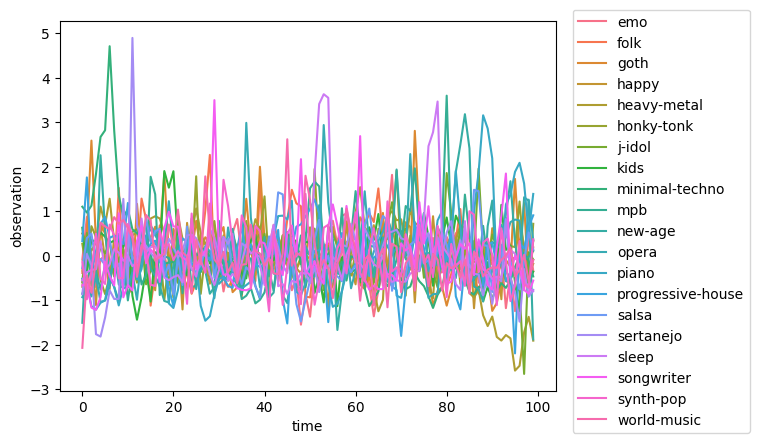

CPU times: user 773 ms, sys: 137 ms, total: 910 ms
Wall time: 534 ms


In [53]:
%%time

df_melt = sample.melt(value_name="observation", var_name="time", id_vars="genre")
sns.lineplot(df_melt, x='time', y='observation', estimator=None, hue='genre')
plt.legend(labels = np.sort(sample['genre'].unique()), bbox_to_anchor=(1.02, 1.05))
plt.show()

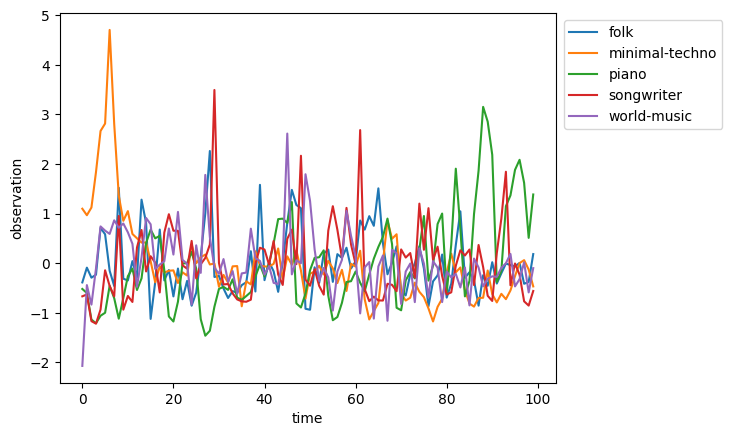

In [54]:
sample_filtered = sample[sample['genre'].isin(['minimal-techno',
                                              'folk',
                                              'world-music',
                                              'piano',
                                              'songwriter'])]
df_melt = sample_filtered.melt(value_name="observation", var_name="time", id_vars="genre")
sns.lineplot(df_melt, x='time', y='observation', estimator=None, hue='genre', palette='tab10')
plt.legend(bbox_to_anchor=(1.35, 1.00))

plt.savefig('./img/Data Understanding/time_series_sample_after.png', dpi=300, bbox_inches='tight')

plt.show()

In [30]:
tsdf_PAA.to_csv('./dataset_preprocessed/time_series/time_series.csv', index=False)

In [31]:
tsdf_SAX.to_csv('./dataset_preprocessed/time_series/time_series_SAX.csv', index=False)